# Machine Learning Project

## Objective

The objective of this jupyter notebook, as part of the web service project, is to of to train a model using the data set provided, explain the model and give an analysis of its accuracy.

In [4]:
# import neccessary libaries. Will add to as needs be.
# to plot data
import matplotlib.pyplot as plt
#to load data as a pandas df
import pandas as pd
# to convert data to a numpy array
import numpy as np
%matplotlib inline
# setting some plt parameters that are always useful
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
# import seaborn for visualiaztions later.
import seaborn as sns
# using for linear regresssion
from sklearn.linear_model import LinearRegression
# using for splitting data into train & test.
from sklearn.model_selection import train_test_split
# using for linear model
from sklearn import linear_model
# using to evaluate sklearn model results.
from sklearn import metrics
#using for polynominal regression.
from sklearn.preprocessing import PolynomialFeatures


# Adapted from https://stackoverflow.com/q/43027980
# A magic function that renders the figure in a notebook (instead of displaying a dump of the figure object).


## Load the Data

In [5]:
# reading the file in as csv.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
# Making a copy of the data just in case I need it later on.
dfmycopy = df

## Explore the Data

In [ ]:
# take a look at the shape: #rows, colums
print("Number of rows:", df.shape[0],"\nNumber of columns: ",df.shape[1])

In [ ]:
# Do any  NaN (null) values exist?
df.isnull().values.any()

In [ ]:
#take a peak at the first rows  (note to self zero values exist)
df.head()

In [ ]:
#take at the last rows
df.tail()

In [ ]:
# describe the data set. 
df.describe()

In [ ]:

# Plot power versus speed to see if there is a relationship between both. 
plt.plot(df['speed'], df['power'],  '.g')
plt.title('Power vs wind speed', fontsize='18')
plt.xlabel('Speed', fontsize='16')
plt.ylabel('Power', fontsize='16')
plt.xticks(np.arange(min(df['speed']), max(df['speed'])+1, 1))
plt.show()

## Initial Visual Observations

From this visual, there appears three regions approximately. In the first region, below speeds of approximately 7.5 the power generated appears low and there does not appear a correlation to speed. One could logically speculate that below a certain speed (threshold) power is not generated (we have all seen still wind turbines) or is at least at low speed the power generated can relatively small or close to zero.

In the second regions, from speed values 7.5 to 10 there appears to be some correlation between speed and power emerging. 

In the third region, from speed values of 10 to 17.5 approx, there appears a rapid growth of power produced.  In otherwords,power generated tends to increase linearly from around speed values of 10 to 17.5. 

In the fourth region, for datapoints with speed values of 17.5 and constant power values are produced. 

But, then there are a number of datapoints with various speed values other than 0 but power produced is zero. **Also there are no speed values beyond approximately 24.5 where there is power generated. 

The below visualization separates those datapoints where power is zero from datapoints where power was actually generated.

In [ ]:

#Selecting rows based on certain conditions
# Adapted from https://stackoverflow.com/a/17071908 
# example df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
# speed greater than zero but power less than or equal to 0
dfa= df.loc[(df['speed'] !=0) & (df['power'] == 0)]
dfb=  df.loc[((df['speed'] !=0) & (df['power'] >0))|(df['speed']==0)]
plt.plot(dfa['speed'], dfa['power'],  'ro', label='zero power at speeds greater than zero')
plt.plot(dfb['speed'], dfb['power'],  'yo', label= 'power generated or speed is zero ')
plt.xticks(np.arange(min(df['speed']), max(df['speed'])+1, 1))
plt.xlabel('speed', fontsize = 18)
plt.ylabel('power', fontsize =18)
plt.title('Power Generated/No power generated Versus Speed values', fontsize = 20)
plt.legend(fontsize = 16)
plt.show()

## Determing which datapoints to exclude from the models.

### 1. Zero power generated at speeds less than or equal to 7.5 (keep)

Before rushing into excluding all values where power is equal to zero. I think it is worth zooming in on the data where speed is less than or equal 7.5.  As the below data visualization shows there are many observations where the power generated is close to zero when speed <=7.5. In my mind these points might legitimize the existance of datapoints with zero power generated when speed <=7.5. So I am reluctant to exclude datapoints where speed <= 7.5 and power generated is zero at this stage. This is the exploratory stage in the process so this decision might well be revisited later after further investigation.

In [ ]:
# examining datapoints where speed <=7.5 and power is not generated.
dfc= df.loc[(df['speed']<=7.5)& (df['power']!=0) ]
print(dfc.describe())

In [ ]:
#Selecting rows based on certain conditions
# Adapted from https://stackoverflow.com/a/17071908 
# example df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
# speed greater than zero but power less than or equal to 0
dfa= df.loc[(df['speed'] !=0) & (df['power'] == 0)]
dfb=  df.loc[((df['speed'] !=0) & (df['power'] >0))|(df['speed']==0)]
plt.plot(dfa['speed'], dfa['power'],  'ro', label='zero power at speeds greater than zero')
plt.plot(dfb['speed'], dfb['power'],  'yo', label= 'power generated or speed is zero ')
plt.xticks(np.arange(min(df['speed']), max(df['speed'])+1, 1))
plt.xlabel('speed', fontsize = 18)
plt.ylabel('power', fontsize =18)
plt.xticks(np.arange(min(df['speed']), max(df['speed'])+1, 1))
plt.title('Zooming in on Speed <= 7.5', fontsize = 20)
plt.legend(fontsize = 16)
plt.xlim(0, 8)
plt.ylim(-0.1,20)
plt.show()


### 2. Zero power generated for speeds between > 7.5 and < 24.5 (exclude)

I do think the 4 datapoints with zero power generated and with speed greater than 7.5 but less than 24.5 approxmiately are strong contenders for being dropped from the dataset.  They do seem to be outliers. Outliers are the data instances that stand out amongst other datapoints in the dataset and fail to conform to the normal behavior in a dataset [1],[2].

### 3. Zero power generated for speeds >= 24.5 (keep)

With regards to zero power generated datapoints with speeds that are greater than 24.5, I am unsure if they should be excluded. But we need to zoom in on the datapoints where speed is greater than 24.
Looking on below figure "Zooming in on Speed <= 24" we can see that **ALL observations at speed 24.5 or greater have zero power**.  Therefore I would conclude at this stage that these observations might well be legitimate. Perhaps a wind turbine doesnt function in "high" winds. My concern is though do I have enough datapoints with speed >=24.5 so that a model will distinguish these datapoints from datapoints with speed < 24.5. 

So to summarize, for the moment or until I know more, keep all datapoints with zero power except those datapoints with speed speed greater than 7.5 but less than 24.5 .  

In [ ]:
# fix the zoom in 

#Selecting rows based on certain conditions
# Adapted from https://stackoverflow.com/a/17071908 
# example df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
# speed greater than zero but power less than or equal to 0
dfa= df.loc[(df['speed'] !=0) & (df['power'] == 0)]
dfb=  df.loc[((df['speed'] !=0) & (df['power'] >0))|(df['speed']==0)]
plt.plot(dfa['speed'], dfa['power'],  'ro', label='zero power at speeds greater than zero')
plt.plot(dfb['speed'], dfb['power'],  'yo', label= 'power generated or speed is zero ')
plt.xticks(dfa['speed'], rotation=90)
plt.xlabel('speed', fontsize = 18)
plt.ylabel('power', fontsize =18)
plt.title('Zooming in on Speed <= 24', fontsize = 20)
# Adapted from https://stackoverflow.com/questions/25540259/remove-or-adapt-border-of-frame-of-legend-using-matplotlib
plt.legend(fontsize = 16, frameon=True)
plt.xlim(24, 26)
plt.ylim(-10,120)
plt.show()

## Data Cleaning

In [ ]:
Removing datapoints with zero power produced at speeds 

In [7]:
# Adapated from https://stackoverflow.com/questions/52456874/drop-rows-on-multiple-conditions-in-pandas-dataframe

dfclean = df.loc[~(((df['speed']>=7.5) & (df['speed']<24.5))&(df['power']==0))]
dfclean.count()

speed    495
power    495
dtype: int64

### View the Cleaned data 

Plotting the linear relationship between power and speed first for the original data and then the cleaned data and comparing side by side reveals little differnce as we have only excluded five data points. 

In [ ]:

# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Comparing Cleaned Data and Original', fontsize = 20)
axes[0].set_title('Orignal Data', fontsize = 16)
sns.regplot(ax=axes[0],x=df['speed'], y=df['power'],color="g", data=df)
axes[1].set_title('Cleaned Data', fontsize = 16)
sns.regplot(ax=axes[1],x=dfclean['speed'], y=dfclean['power'], color="b",data=dfclean)

This is confirmed imposing one plot on top of another (ie viewing the original data and the cleaned data in the same subplot). The data cleansing process made little difference and may have been futile based on my decisions as to what was considered outliers. But is the a linear regression the correct tool to use anyway?

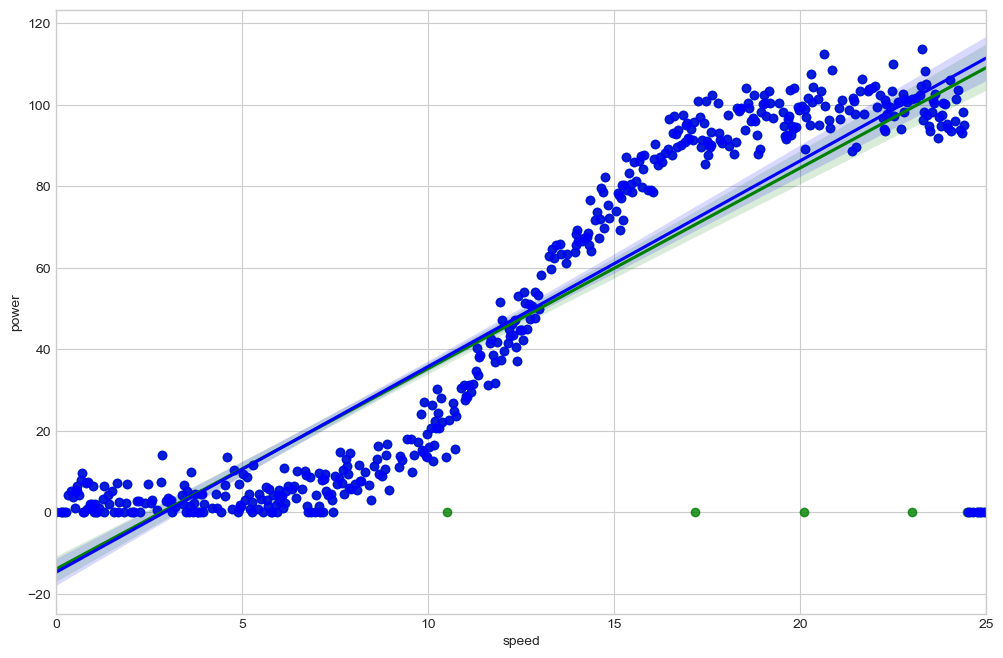

In [8]:
# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

sns.regplot(x=df['speed'], y=df['power'],color = "g", data=df)

sns.regplot(x=dfclean['speed'], y=dfclean['power'],color = "b", data=dfclean)


## MODELS

### Model 1 : Linear Regression

Firstly I will try to fit a linear model to the cleaned data.  I anticipdate a linear model might predict  power for speeds within the range 7.5 to 17.5 well enough perhaps as overall there appears some level of relationship between speed and power. Within that range though, 10 to 17.5, I would anticipate a strong linear relationship. However, the model I would think be inadequate for speed values < 7.5 where the relationshop appears more erratic. Also for speed values > 17 and < 24.5 the power generated levels off and so therefore a linear model would be less appropriate. However, I will start with a simple linear model to validate these assumptions. 

The Linear regression model essentially finds the best value for the intercept and slope, which results in a line that best fits the data. The equation for straight line is: $y = mx + b$.  b is the intercept and m is the slope of the line. The linear regression algorithm returns the optimal value for the intercept and the slope. There can be multiple straight lines dependent on the values of intercept and slope. The linear regression algorithm fits multiple lines on the data points and returns the line that results in the least error [3].



In [9]:
# Adapted from : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
# extra []ensuring that we end up with 2d array see https://stackoverflow.com/q/51150153
X = dfclean[["speed"]] 
y = dfclean["power"]
# print(X.dtype)

In [10]:
# Setting the test size = 0.2 using a random state to perserve outputs. 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 40)

In [11]:
# review the number of observations in each set.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(297, 1)
(198, 1)
(297,)
(198,)


In [12]:
# Create linear regression object reg
reg = linear_model.LinearRegression()

In [13]:
# Adapted from : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.htm
#fit the inputs and outputs to the object
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# y = mx + b
# Where b is the intercept and m (coefficient)is the slope of the line. 

In [14]:
print("The optimal intercept value returned is ", reg.intercept_)

The optimal intercept value returned is  -14.032311675979706


In [15]:
print("The optimal slope value (coefficient) returned is ", reg.coef_)

The optimal slope value (coefficient) returned is  [4.92169253]


This means that for every one unit of change in speed, the predicted change in the power generated is about 9.91%.

In [16]:
# The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.
y_pred = reg.predict(X_test)


### Evalution Model 1 Results.

In [17]:
# create a df to hold actuals and predicted.

dflineareval = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dflineareval

,Actual,Predicted
384,103.387,80.311612
432,97.797,92.876693
228,41.486,43.364467
151,6.853,23.165840
444,97.803,95.952751
...,...,...
361,89.789,75.015871
421,99.103,89.549629
294,78.284,60.359071
270,63.265,53.586822


Mean Absolute Error (MAE) is the mean of the absolute value of the errors. 

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

In [ ]:
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [18]:
r2 = metrics.r2_score(y_test,y_pred)
r2

0.8163401680458816

You can see that the value of root mean squared error is significantly greater than 10% of the mean value of the power generated in the test set 12.715116.  This means that the model was not very accurate and an over simplified algorithm for this dataset. 

### Plot the results 

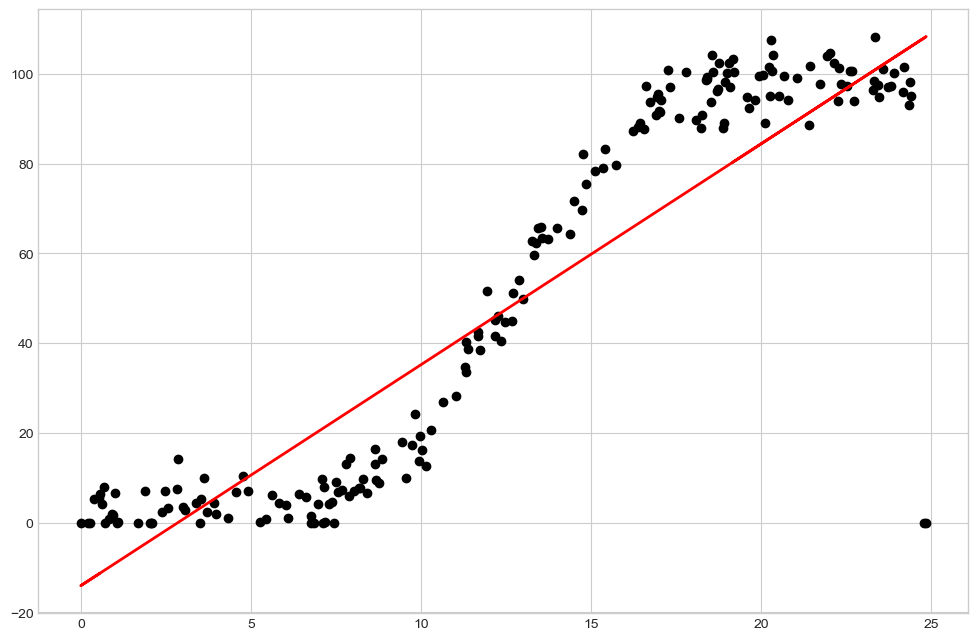

In [19]:
plt.scatter(X_test, y_test,  color='black') #plot scatters
plt.plot(X_test, y_pred, color='red', linewidth=2) #plot line

plt.show()

Again, the results show the alogrithm is unsuitable. The model is underfitting: proofing too inflexible and not accounting for the data being unable to capture patterns in the data. To overcome the problem of under-fitting, the complexity of the model needs to increased [6].



### Model 2 : Polynomial Regression.

A Polynominal Model is a special case of a linear model and can be used to fit a nonlinear data [5]. A straightforward way to do this is to add powers of each feature as new features [5].  Then, train a linear model on this extended set of features[5]. 

### Degrees = 2

So to begin the number of degrees will be set to 2. As to generate a higher order equation add powers of the original features as new features. The linear model: 
$$y = \theta_0 + \theta_1 x $$

can then be transformed to:

$$ y = \theta_0 + \theta_1 x + \theta_2 x^2$$ 

This is still a linear model as the coefficients associated with the features are still linear. x² is only a feature. But the curve being fitted is quadratic in nature [6]

In [ ]:
# Adapted from : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
# Adapted from https://towardsdatascience.com/polynomial-regression-with-a-machine-learning-pipeline-7e27d2dedc87
# sklearn.preprocessing.PolynomialFeatures

In [ ]:
# Setting the test size = 0.2 using a random state to perserve outputs. 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)

In [24]:
# set the polynominal degrees to be 2
polyfeatures = PolynomialFeatures(degree=2, include_bias=False)
# create new features for the training data i.e. powers of x (adding a new variable x powered)
X_train_p =polyfeatures.fit_transform(X_train)

In [25]:
# Create a new linear model
polyreg = linear_model.LinearRegression()
# Train the model using the new dataset 
polyreg.fit(X_train_p, y_train)

# now create new features for the test data
X_test_p =polyfeatures.fit_transform(X_test)

# predict new y values for test data.
y_pred_p = polyreg.predict(X_test_p)

### Plot the result

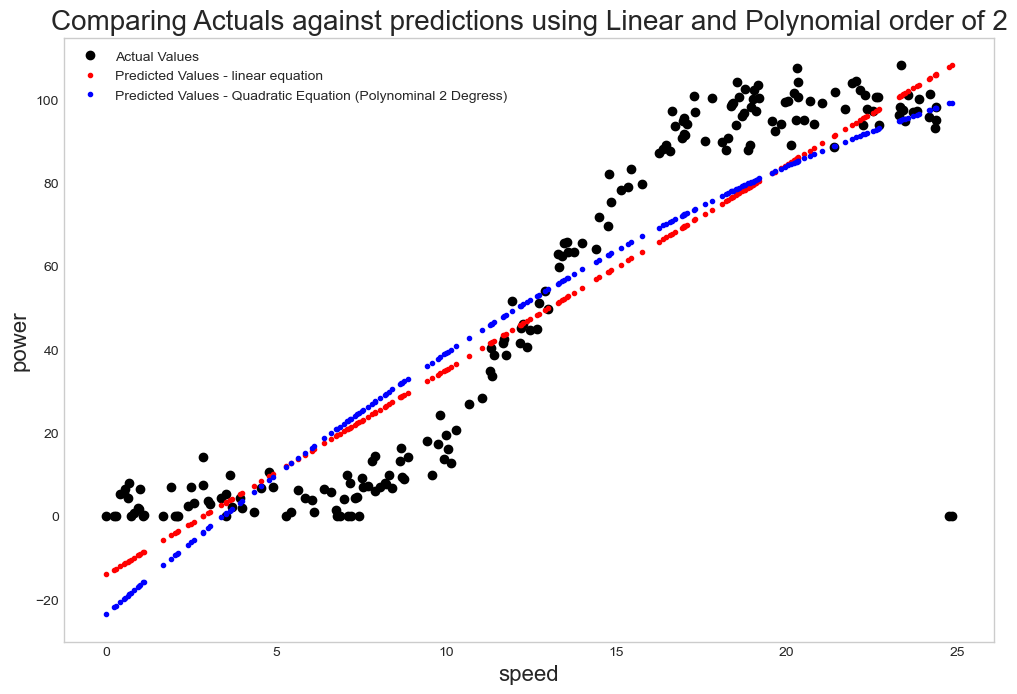

In [90]:
# Adapted from https://stackoverflow.com/questions/46096347/plot-polynomial-regression-in-python-with-scikit-learn
# plt.plot(dfclean['speed'], dfclean['power'],  'og', label="cleaned data")
# plt.scatter(X_test, y_test,  color='black') #plot scatters
# plt.plot(X_test_p, y_pred_p, color='red', linewidth=2) #plot line


plt.plot(X_test, y_test, 'ok', label="Actual Values") 
plt.plot(X_test, y_pred, '.r', label = "Predicted Values - linear equation") 
plt.plot(X_test, y_pred_p, '.b', label = "Predicted Values - Quadratic Equation (Polynominal 2 Degress)")
plt.xlabel('speed', fontsize='16')
plt.ylabel('power', fontsize='16')
plt.title("Comparing Actuals against predictions using Linear and Polynomial order of 2", fontsize = 20)
plt.grid()
plt.legend()
plt.show()



### Evaluate the result

It is quite clear visually from the plot that the quadratic curve (polynominal with degrees = 2) is not able to fit the data much better than the linear line. 

In [46]:
rmse_linear = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse_poly_d2 = np.sqrt(metrics.mean_squared_error(y_test,y_pred_p))
r2_linear = metrics.r2_score(y_test,y_pred)
r2_poly_d2 = metrics.r2_score(y_test,y_pred_p)
print("RMSE value for linear equation: ", rmse_linear)
print("RMSE value using Polynomial with degrees = 2: ",rmse_poly_d2  )
print("R2 Value using linear equation: ", r2_linear)
print("R2 Value using polynominal equation with degrees = 2: ", r2_poly_d2)

RMSE value for linear equation:  17.953625179647567
RMSE value using Polynomial with degrees = 2:  18.27393980952383
R2 Value using linear equation:  0.8163401680458816
R2 Value using polynominal equation with degrees = 2:  0.8097282754013739


We can see that RMSE has decreased but the R²score has increased as compared to the linear line. We need an improvement in both ***metrics***

### Model 2 : Polynomial Regression with 3 degrees.

The next step is to try a cubic curve (degree=3) by powering up our existing equation(quadatric)[6]:

$$ y = \theta_0 + \theta_1 x + \theta_2 x^2  + \theta_3x^3$$ 


In [52]:
# set the polynominal degrees to be 3
polyfeatures3 = PolynomialFeatures(degree=3, include_bias=False)
# create new features for the training data i.e. adding new variables to create a cubic equation.
X_train_p3 =polyfeatures3.fit_transform(X_train)

In [54]:
# Create a new cubic model
polyreg3 = linear_model.LinearRegression()
# Train the model using the new dataset 
polyreg3.fit(X_train_p3, y_train)

# now create new features for the test data
X_test_p3 =polyfeatures3.fit_transform(X_test)

# predict new y values for test data.
y_pred_p3 = polyreg3.predict(X_test_p3)

In [ ]:
Plot the result

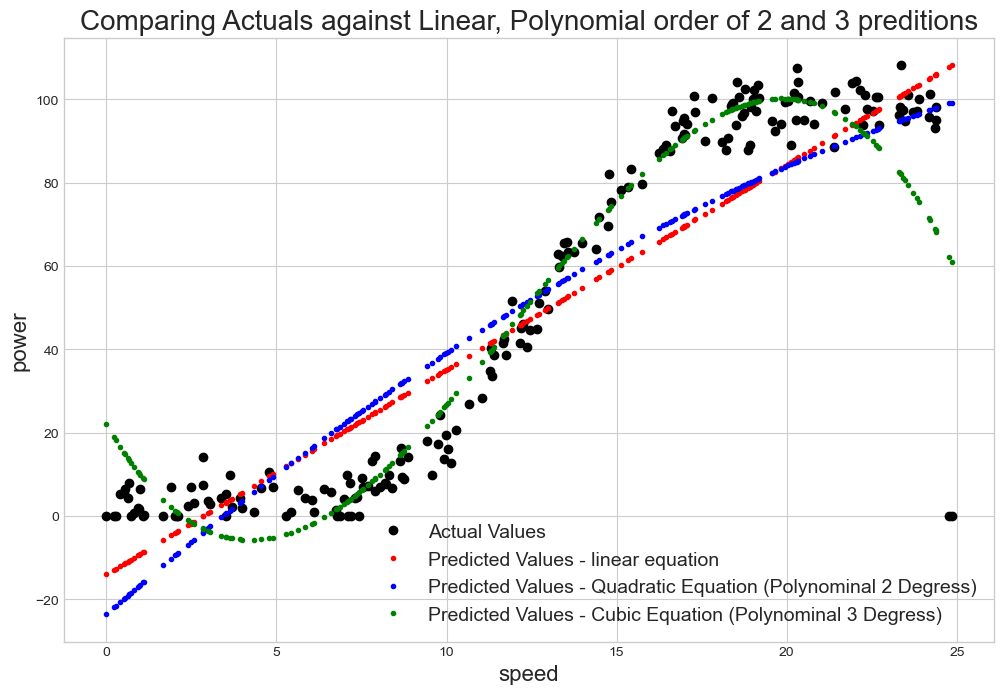

In [93]:
# plot the results & compare

plt.plot(X_test, y_test, 'ok', label="Actual Values") 
plt.plot(X_test, y_pred, '.r', label = "Predicted Values - linear equation") 
plt.plot(X_test, y_pred_p, '.b', label = "Predicted Values - Quadratic Equation (Polynominal 2 Degress)")
plt.plot(X_test, y_pred_p3, '.g', label = "Predicted Values - Cubic Equation (Polynominal 3 Degress)")
plt.xlabel('speed', fontsize='16')
plt.ylabel('power', fontsize='16')
plt.title("Comparing Actuals against Linear, Polynomial order of 2 and 3 preditions", fontsize = 20)
plt.grid()
plt.legend(fontsize = 14)
plt.grid()
plt.show()

### Evaluate the result

The visulations shows that predicted values using a Cubic equation (Polynominal 3 Degrees) is a better model.

In [84]:
rmse_linear = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse_poly_d2 = np.sqrt(metrics.mean_squared_error(y_test,y_pred_p))
rmse_poly_d3 = np.sqrt(metrics.mean_squared_error(y_test,y_pred_p3))
r2_linear = metrics.r2_score(y_test,y_pred)
r2_poly_d2 = metrics.r2_score(y_test,y_pred_p)
r2_poly_d3 = metrics.r2_score(y_test,y_pred_p3)
print("RMSE value for linear equation: ", rmse_linear)
print("RMSE value using Polynomial with degrees = 2: ",rmse_poly_d2)
print("RMSE value using Polynomial with degrees = 3: ",rmse_poly_d3)
print("R2 Value using linear equation: ", r2_linear)
print("R2 Value using polynominal equation with degrees = 2: ", r2_poly_d2)
print("R2 Value using polynominal equation with degrees = 3: ", r2_poly_d3)

RMSE value for linear equation:  17.953625179647567
RMSE value using Polynomial with degrees = 2:  18.27393980952383
RMSE value using Polynomial with degrees = 3:  10.846810499094365
R2 Value using linear equation:  0.8163401680458816
R2 Value using polynominal equation with degrees = 2:  0.8097282754013739
R2 Value using polynominal equation with degrees = 3:  0.9329630911893347


The RMSE when using a cubic equation has decreased for polynominal with degrees = 3 and the R²-score has increased as compared to the linear line results. Therefore Polynominal model with degrees = 3 is the best fit so far.

In [ ]:
# set the polynominal degrees to be 3
polyfeatures4 = PolynomialFeatures(degree=4, include_bias=False)
# create new features for the training data i.e. adding new variables to create a cubic equation.
X_train_p4 =polyfeatures4.fit_transform(X_train)
# Create a new cubic model
polyreg4 = linear_model.LinearRegression()
# Train the model using the new dataset 
polyreg4.fit(X_train_p4, y_train)

# now create new features for the test data
X_test_p4 =polyfeatures4.fit_transform(X_test)

# predict new y values for test data.
y_pred_p4 = polyreg4.predict(X_test_p4)

In [87]:
rmse_poly_d4 = np.sqrt(metrics.mean_squared_error(y_test,y_pred_p4))
r2_poly_d4 = metrics.r2_score(y_test,y_pred_p4)
print("RMSE value using Polynomial with degrees = 4: ",rmse_poly_d4)
print("R2 Value using polynominal equation with degrees = 4: ", r2_poly_d4)

RMSE value using Polynomial with degrees = 4:  10.646787070802638
R2 Value using polynominal equation with degrees = 4:  0.9354127175911665


Therefore, the optimal model so far is a polynominal equation with degrees = 3.

## Two Problems

1. How many dregrees should I use in a polynomial equation? Should I keep increase the number of degrees further?  
2. Should the data points where speed > 24.5 be included in the model? As  

## References

[1] https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm    
[2] Kotu, V., & Deshpande, B., "Anomaly Detection", Science Direct https://www.sciencedirect.com/topics/computer-science/anomaly-detection  
[3] Robinson, S. "Linear Regression in Python with Scikit-Learn", Stack Abuse https://stackabuse.com/linear-regression-in-python-with-scikit-learn/  
[4] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html  
[5] Pramoditha, R, "Polynomial Regression with a Machine Learning", Towards DataScience, https://towardsdatascience.com/polynomial-regression-with-a-machine-learning-pipeline-7e27d2dedc87
[6] Agarwal A., "Polynomial Regression" Towards Data Science, https://towardsdatascience.com/polynomial-regression-bbe8b9d97491